In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, KFold
from category_encoders import CatBoostEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import optuna
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
df = [train, test]
df = pd.concat(df)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,

In [ ]:
# summary_df = pd.DataFrame(data={'NaN_count': df.isna().sum(), 'data_type': df.dtypes})

# categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# num_categorical = len(categorical_columns)
# print(f'Количество категориальных признаков: {num_categorical}')
# print(f'Названия категориальных признаков: {categorical_columns}')

# num_numerical = len(numerical_columns)
# print(f'Количество числовых признаков: {num_numerical}')
# print(f'Названия числовых признаков: {numerical_columns}')

# # Выводим сводную таблицу с NaN_count и data_type
# print(summary_df)

In [ ]:
# plt.hist(df['SalePrice'])

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
# plt.hist(df['SalePrice'])

In [ ]:
# Удаление столбов и заполнение пропусков в категориальных

drop_col = ['Alley', 'MiscFeature'] # Колонки на удаление, не несущие информации
replace_nan_col = ['MasVnrType', 'FireplaceQu', 'Fence', 'PoolQC', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']  # меняем значение nan на отсутствует
fill_mode_col = ['Electrical', 'KitchenQual', 'Functional', 'SaleType', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd'] # заполняем модой


my_imputer1 = ColumnTransformer(
    transformers = [
        ('drop', 'drop', drop_col),
        ('replace', SimpleImputer(strategy='constant', fill_value='Unknown'), replace_nan_col),
        ('fill_mode', SimpleImputer(strategy='most_frequent'), fill_mode_col),
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)

In [ ]:
# Заполнение пропусков в числовых

median_impute_columns = ['LotFrontage', 'MasVnrArea']
mode_impute_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


# Create SimpleImputer for median and mode
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

my_imputer2 = ColumnTransformer(
    transformers=[
        ('median_imputer', median_imputer, median_impute_columns),
        ('mode_imputer', mode_imputer, mode_impute_columns)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'  
)


In [ ]:
# pd.DataFrame(data={'NaN_count': df.isna().sum(), 'data_type':df.dtypes})

In [ ]:
# Кодировка категориальных

# one-hot все признаки с небольшим и независимым количеством вариантов
# ordinal признаки имеющие внутренние порядок и ранжируемость
# cat-boost большое кол-во независимых признаков (влияющие на таргет)

one_hot_encoding_columns = ['Street', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive',
                            'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType', 'SaleCondition', 'MSSubClass' ]
ordinal_encoding_columns = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'OverallQual', 'OverallCond']
#catboost_ecncoding_columns = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType', 'SaleCondition', 'MSSubClass'] # временно переезжает в one hot

my_encoder = ColumnTransformer(
    [
        ('one_hot_encoding', OneHotEncoder(sparse_output=False), one_hot_encoding_columns),
        ('ordinal_encoding', OrdinalEncoder(), ordinal_encoding_columns),
        #('catboost_encoding_columns', CatBoostEncoder(handle_missing='value', handle_unknown='value'), catboost_ecncoding_columns),
    ],
    verbose_feature_names_out = False,
    remainder = 'passthrough' 
)

In [ ]:
# Скейлинг числовых

num_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

standard_scaler = StandardScaler()
my_scaler = ColumnTransformer(
    transformers=[
        ('scaler', standard_scaler, num_features)  
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'  
)

In [ ]:
preprocessor = Pipeline(
    [
        ('imputer_cat', my_imputer1),
        ('imputer_num', my_imputer2),
        ('encoder', my_encoder),
        ('scaler', my_scaler)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X_train = pd.DataFrame(X[:1460])
test  = pd.DataFrame(X[1460:])
y_train = pd.Series(y[:1460])
y_train = np.log1p(y_train)

# Charts

In [1]:
import seaborn as sns
# 1. Histogram of Log Prices (SalePrice)
# plt.hist(df['SalePrice'])

plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=30, kde=True)




KeyboardInterrupt



/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


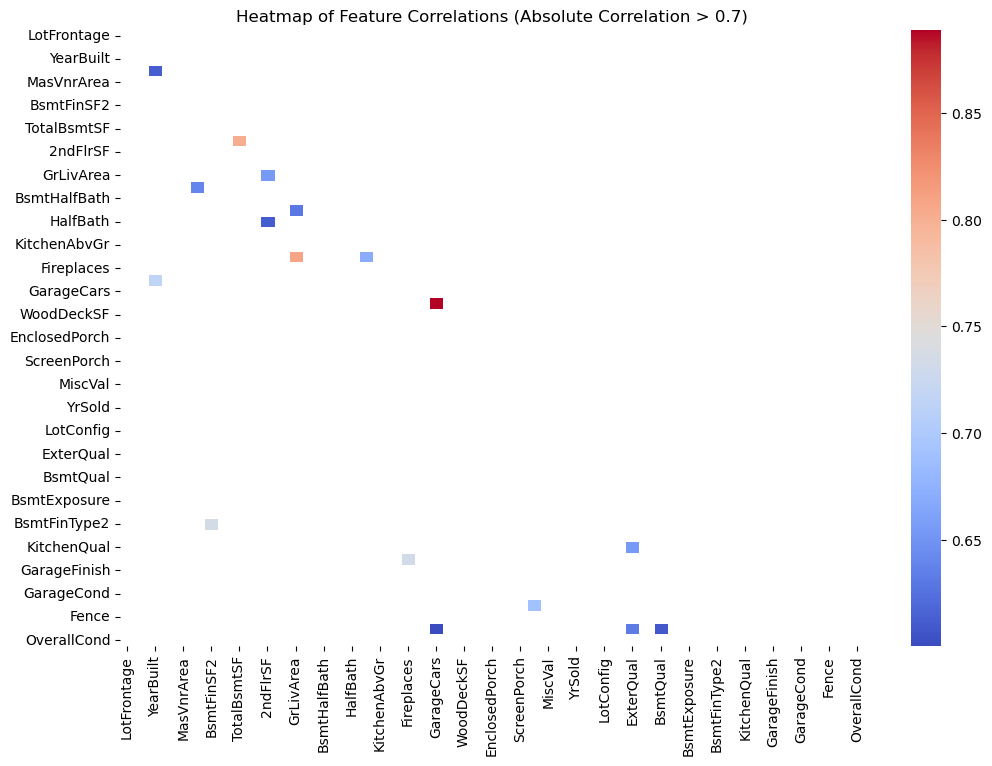

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


combined_features = num_features + ordinal_encoding_columns

# Calculate the correlation matrix
corr_matrix = X[combined_features].corr().abs()

# Filter for correlations greater than 0.7
high_corr_matrix = corr_matrix[corr_matrix > 0.6]

# Create a mask to display only the upper triangle
mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(high_corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations (Absolute Correlation > 0.7)')
plt.show()


In [ ]:
# Filter for pairs with absolute correlation greater than 0.6
high_corr_pairs = corr_matrix[corr_matrix > 0.6].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Drop duplicate pairs (keep only one of each pair)
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs[['Feature1', 'Feature2']].apply(frozenset, axis=1).duplicated() == False]

# Sort the pairs by correlation value in descending order
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)
high_corr_pairs

,Feature1,Feature2,Correlation
43,GarageCars,GarageArea,0.888722
24,GrLivArea,TotRmsAbvGrd,0.808354
14,TotalBsmtSF,1stFlrSF,0.801376
11,BsmtFinSF2,BsmtFinType2,0.734010
39,Fireplaces,FireplaceQu,0.732938
4,YearBuilt,GarageYrBlt,0.715628
53,PoolArea,PoolQC,0.690263
33,BedroomAbvGr,TotRmsAbvGrd,0.669737
61,ExterQual,KitchenQual,0.655321
18,2ndFlrSF,GrLivArea,0.655085


In [ ]:
# Calculate correlation with the target variable
target_corr = X_train[combined_features].corrwith(y_train).reset_index()
target_corr.columns = ['Feature', 'Correlation']
target_corr['AbsCorrelation'] = target_corr['Correlation'].abs()

# Filter for correlations greater than 0.7 and around 0
high_target_corr = target_corr[target_corr['AbsCorrelation'] > 0.6]
low_target_corr = target_corr[target_corr['AbsCorrelation'] < 0.1]

print("Correlation of Features with SalePrice (abs(corr) > 0.6):")
print(high_target_corr)

print("Correlation of Features with SalePrice (abs(corr) around 0):")
print(low_target_corr)

Correlation of Features with SalePrice (abs(corr) > 0.6):
         Feature  Correlation  AbsCorrelation
8    TotalBsmtSF     0.612134        0.612134
12     GrLivArea     0.700927        0.700927
22    GarageCars     0.680625        0.680625
23    GarageArea     0.650888        0.650888
46  GarageFinish    -0.604878        0.604878
51   OverallQual     0.817185        0.817185
Correlation of Features with SalePrice (abs(corr) around 0):
         Feature  Correlation  AbsCorrelation
6     BsmtFinSF2     0.004832        0.004832
11  LowQualFinSF    -0.037963        0.037963
14  BsmtHalfBath    -0.005149        0.005149
27     3SsnPorch     0.054900        0.054900
29      PoolArea     0.069798        0.069798
30       MiscVal    -0.020021        0.020021
31        MoSold     0.057330        0.057330
32        YrSold    -0.037263        0.037263
33     Utilities    -0.012632        0.012632
34     LotConfig    -0.072886        0.072886
35     LandSlope     0.038526        0.038526
39     

In [ ]:
# High correlation pairplots


SyntaxError: positional argument follows keyword argument (3524227889.py, line 3)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

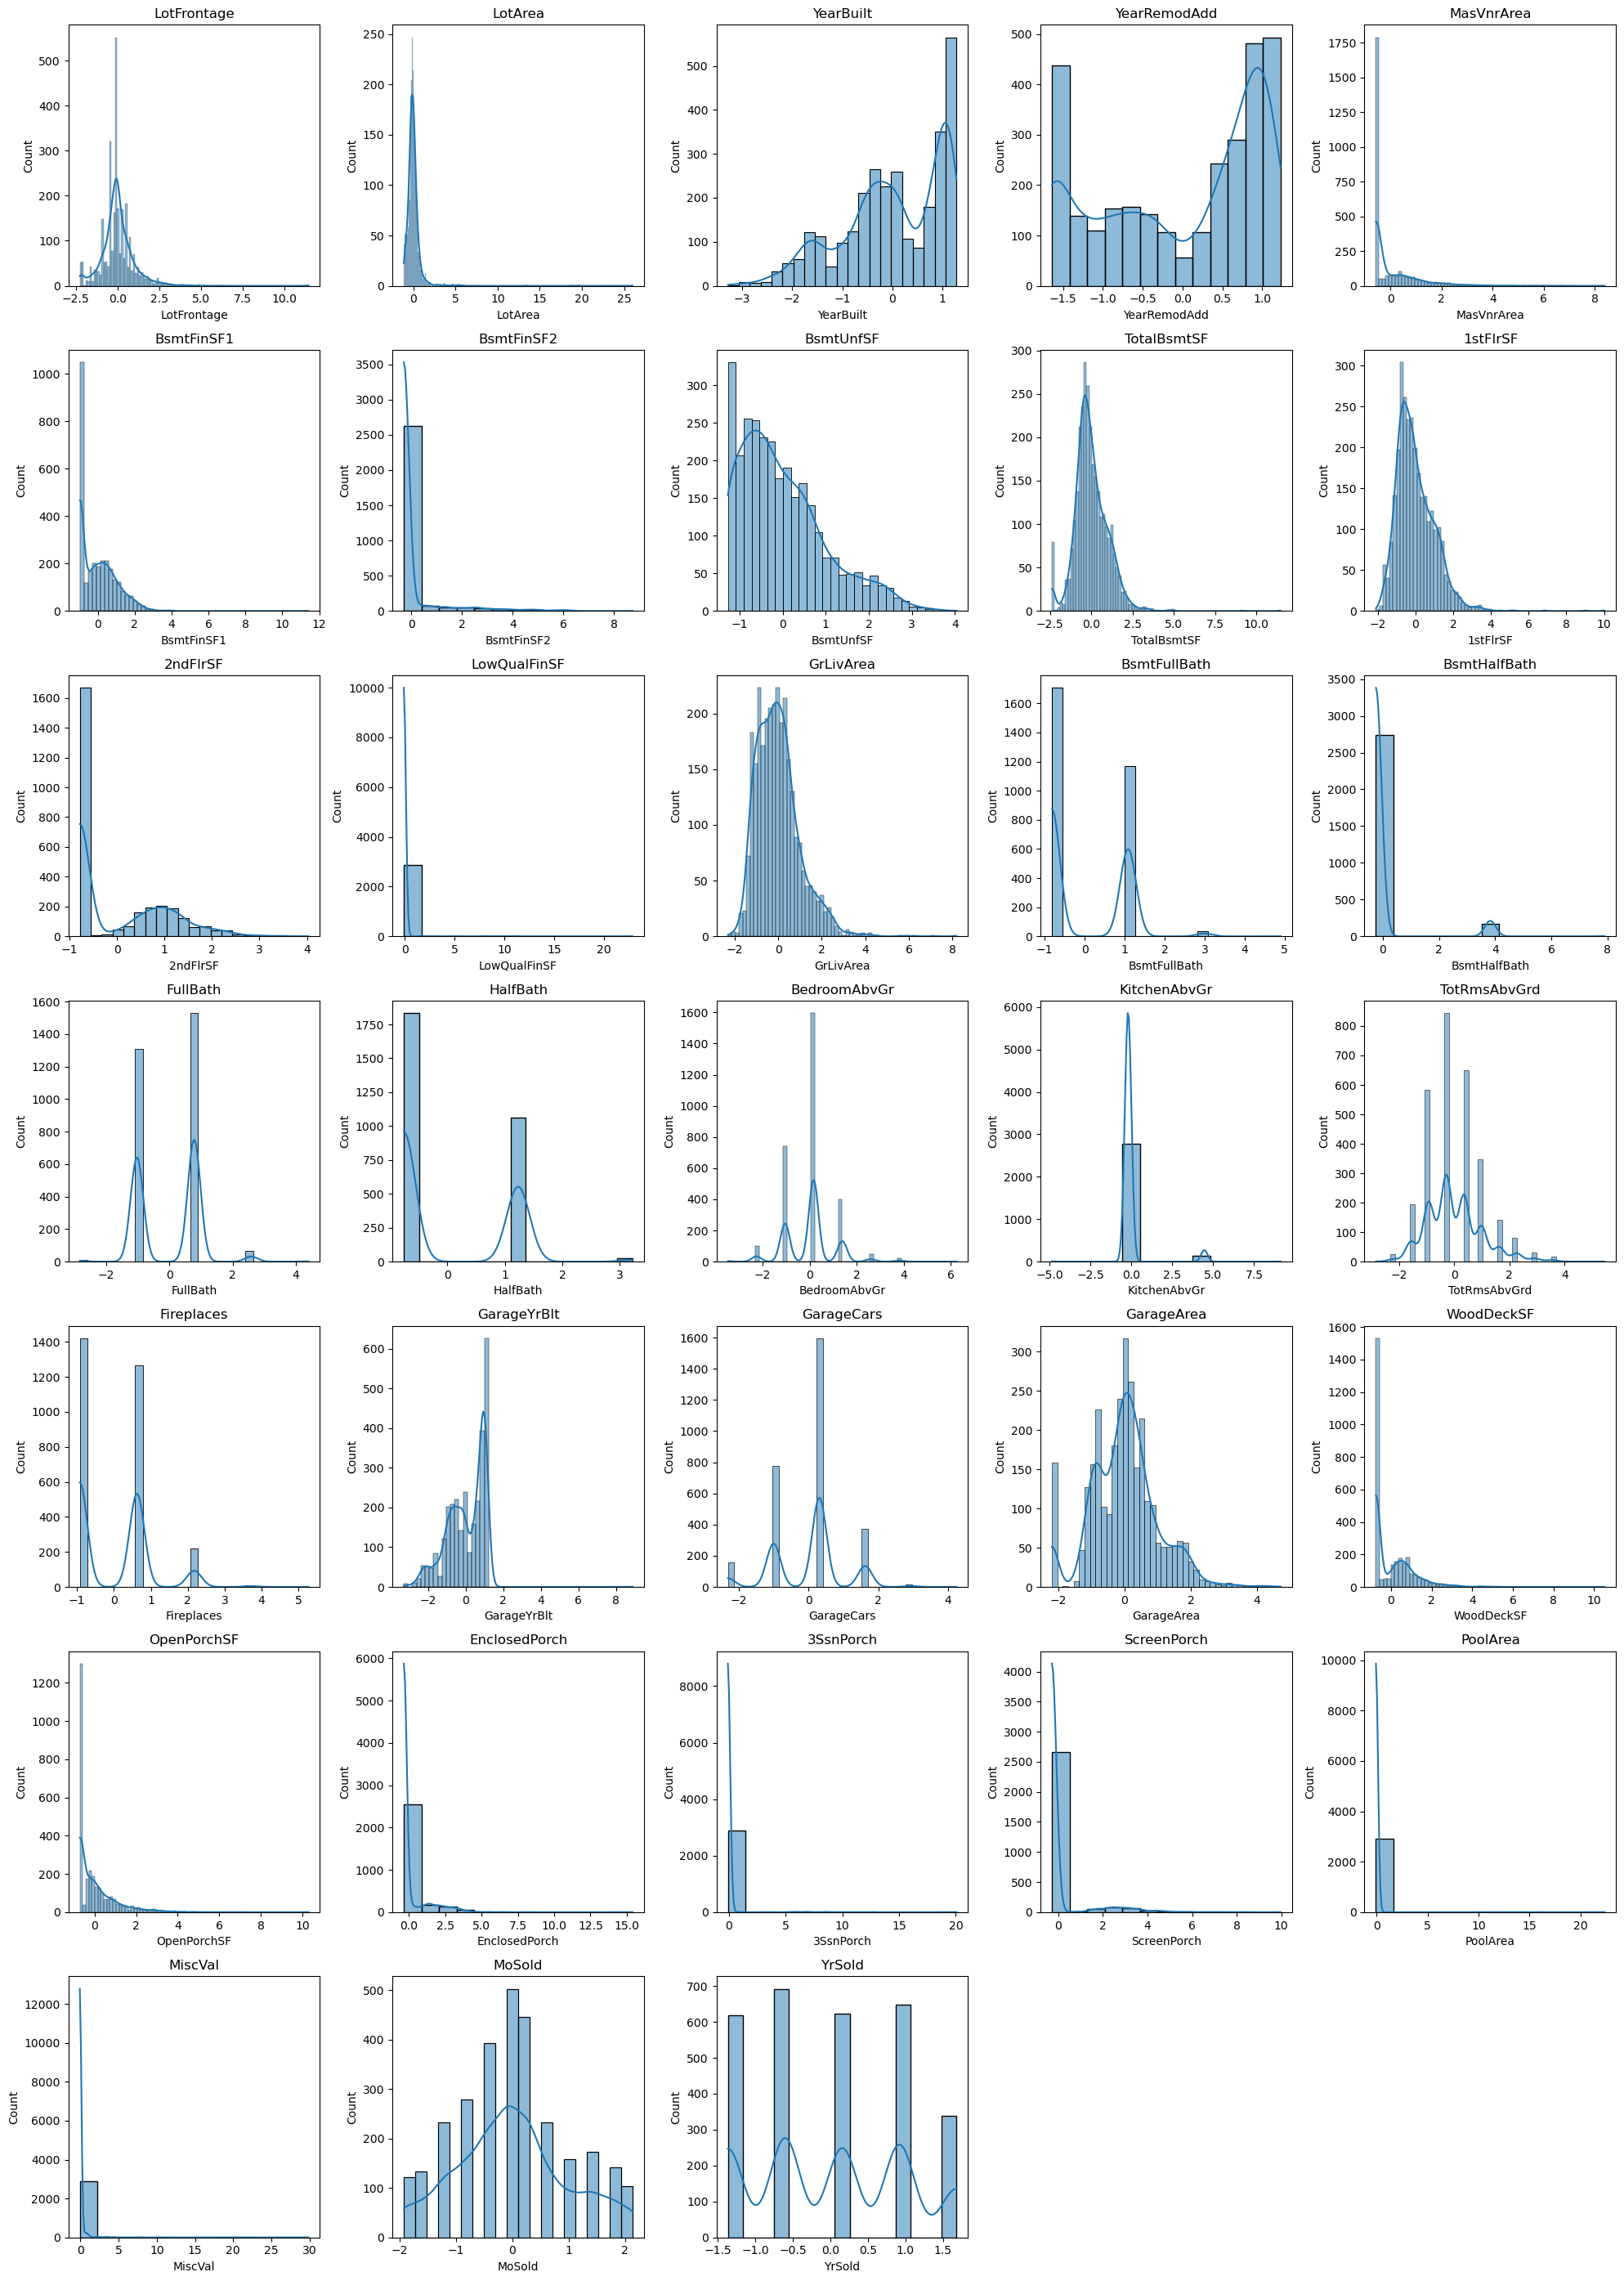

In [ ]:
num_cols = len(num_features)
num_rows = (num_cols + 4) // 5

plt.figure(figsize=(20, num_rows * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, 5, i)
    sns.histplot(X[feature].dropna(), kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


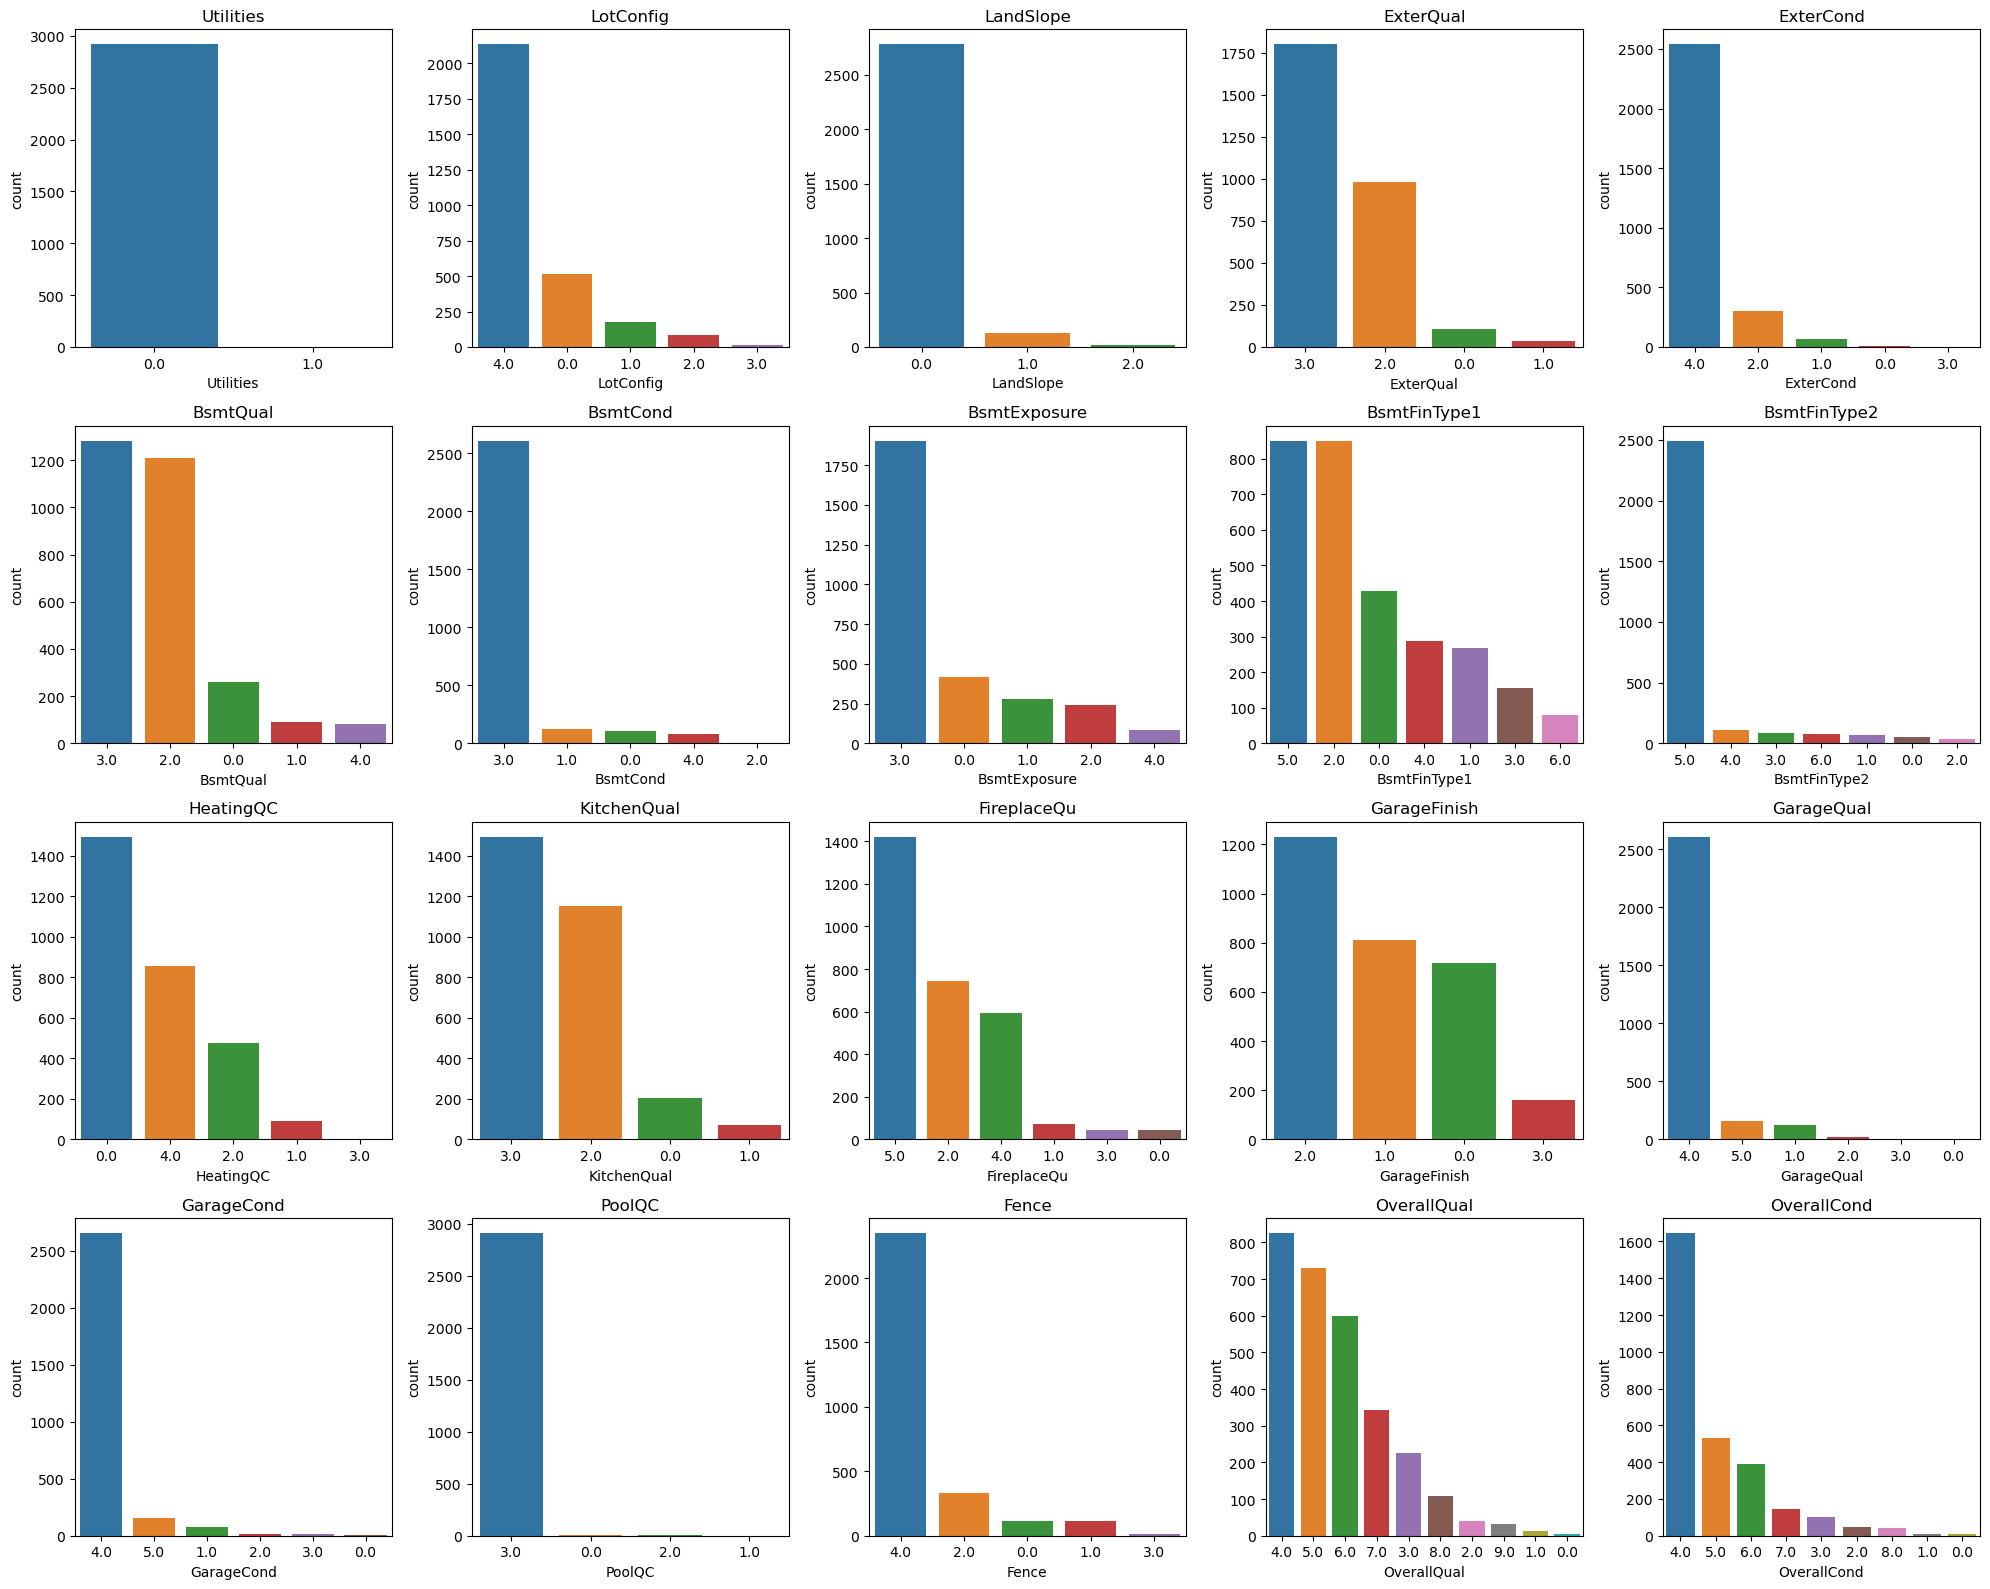

In [ ]:
cat_features =  ordinal_encoding_columns # + one_hot_encoding_columns 🚧 bug with "none of them are in are in the [columns]""
cat_cols = len(cat_features)
cat_rows = (cat_cols + 4) // 5

plt.figure(figsize=(20, cat_rows * 4))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(cat_rows, 5, i)
    sns.countplot(x=X[feature], order=X[feature].value_counts().index)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [ ]:
X[one_hot_encoding_columns].head()

KeyError: "None of [Index(['Street', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation',\n       'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive',\n       'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType',\n       'SaleCondition', 'MSSubClass'],\n      dtype='object')] are in the [columns]"

# End of Charts

In [ ]:
X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,random_state=42)

In [ ]:
X_valid.shape, Y_valid.shape

((292, 234), (292,))

In [ ]:
lr =  LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_log = lr.predict(test)
y_pred = np.expm1(y_pred_log)
submission_lr = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred})
submission_lr

,Id,SalePrice
0,0,120469.962131
1,1,158696.227587
2,2,179201.175506
3,3,198518.616941
4,4,202047.706758
...,...,...
1454,1454,80305.815211
1455,1455,81079.188045
1456,1456,169058.915485
1457,1457,112975.238244


In [ ]:
#catboost

model = CatBoostRegressor()
model.fit(X_train1, Y_train1)

Learning rate set to 0.04196
0:	learn: 0.3805843	total: 133ms	remaining: 2m 12s
1:	learn: 0.3709556	total: 136ms	remaining: 1m 8s
2:	learn: 0.3607172	total: 139ms	remaining: 46.3s
3:	learn: 0.3516663	total: 142ms	remaining: 35.4s
4:	learn: 0.3430351	total: 144ms	remaining: 28.7s
5:	learn: 0.3347359	total: 149ms	remaining: 24.7s
6:	learn: 0.3267356	total: 152ms	remaining: 21.5s
7:	learn: 0.3191128	total: 154ms	remaining: 19.1s
8:	learn: 0.3114236	total: 157ms	remaining: 17.2s
9:	learn: 0.3042470	total: 158ms	remaining: 15.7s
10:	learn: 0.2973143	total: 161ms	remaining: 14.4s
11:	learn: 0.2902449	total: 165ms	remaining: 13.6s
12:	learn: 0.2846118	total: 168ms	remaining: 12.8s
13:	learn: 0.2785341	total: 171ms	remaining: 12.1s
14:	learn: 0.2727865	total: 174ms	remaining: 11.5s
15:	learn: 0.2669697	total: 178ms	remaining: 10.9s
16:	learn: 0.2611867	total: 183ms	remaining: 10.6s
17:	learn: 0.2557057	total: 188ms	remaining: 10.2s
18:	learn: 0.2506882	total: 192ms	remaining: 9.91s
19:	learn: 

450:	learn: 0.0632169	total: 1.16s	remaining: 1.41s
451:	learn: 0.0631528	total: 1.16s	remaining: 1.41s
452:	learn: 0.0631011	total: 1.16s	remaining: 1.41s
453:	learn: 0.0630372	total: 1.17s	remaining: 1.4s
454:	learn: 0.0629689	total: 1.17s	remaining: 1.4s
455:	learn: 0.0628052	total: 1.17s	remaining: 1.39s
456:	learn: 0.0627242	total: 1.17s	remaining: 1.39s
457:	learn: 0.0626370	total: 1.17s	remaining: 1.39s
458:	learn: 0.0625405	total: 1.17s	remaining: 1.38s
459:	learn: 0.0625061	total: 1.17s	remaining: 1.38s
460:	learn: 0.0623524	total: 1.18s	remaining: 1.38s
461:	learn: 0.0622737	total: 1.18s	remaining: 1.37s
462:	learn: 0.0622015	total: 1.18s	remaining: 1.37s
463:	learn: 0.0621341	total: 1.18s	remaining: 1.36s
464:	learn: 0.0620100	total: 1.18s	remaining: 1.36s
465:	learn: 0.0619940	total: 1.18s	remaining: 1.36s
466:	learn: 0.0619260	total: 1.18s	remaining: 1.35s
467:	learn: 0.0618328	total: 1.19s	remaining: 1.35s
468:	learn: 0.0617937	total: 1.19s	remaining: 1.34s
469:	learn: 0.

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.6, 0.95),
        'random_state': 42,
        'loss_function': 'RMSE',
        'logging_level': 'Silent'
    }
    
    model = CatBoostRegressor(**params)
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_log_error')
    rmsle = np.sqrt(-scores.mean())  # Конвертация в RMSLE
    
    return rmsle

# Создание и запуск оптимизации с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_rmsle = study.best_value

print(f"Лучшие параметры: {best_params}")
print(f"Лучшее значение RMSLE: {best_rmsle}")

[I 2024-07-12 11:08:59,674] A new study created in memory with name: no-name-ab07ab6b-55e3-4bd1-9b48-3db318004406
/var/folders/xf/3xhl_qq52t586dzkmy3c94000000gn/T/ipykernel_76007/487152276.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/xf/3xhl_qq52t586dzkmy3c94000000gn/T/ipykernel_76007/487152276.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
/var/folders/xf/3xhl_qq52t586dzkmy3c94000000gn/T/ipykernel_76007/487152276.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

Лучшие параметры: {'n_estimators': 900, 'learning_rate': 0.06895898783802631, 'depth': 6, 'subsample': 0.6081867286334638, 'colsample_bylevel': 0.6706803334889954}
Лучшее значение RMSLE: 0.009608204392623583


In [ ]:
params = {'n_estimators': 1000,
 'learning_rate': 0.046749631417081536,
 'depth': 6,
 'subsample': 0.8604643149014215,
 'colsample_bylevel': 0.8250146302036484}
model_cb = CatBoostRegressor(**params)
model_cb.fit(X_train1, Y_train1)

0:	learn: 0.3788466	total: 1.37ms	remaining: 1.37s
1:	learn: 0.3676399	total: 2.68ms	remaining: 1.34s
2:	learn: 0.3574078	total: 3.91ms	remaining: 1.3s
3:	learn: 0.3473450	total: 5.18ms	remaining: 1.29s
4:	learn: 0.3375528	total: 6.44ms	remaining: 1.28s
5:	learn: 0.3284103	total: 7.79ms	remaining: 1.29s
6:	learn: 0.3204248	total: 9.17ms	remaining: 1.3s
7:	learn: 0.3111560	total: 10.5ms	remaining: 1.3s
8:	learn: 0.3029119	total: 11.7ms	remaining: 1.29s
9:	learn: 0.2952298	total: 13.1ms	remaining: 1.29s
10:	learn: 0.2870872	total: 14.3ms	remaining: 1.29s
11:	learn: 0.2797243	total: 15.9ms	remaining: 1.3s
12:	learn: 0.2728072	total: 17.2ms	remaining: 1.31s
13:	learn: 0.2666473	total: 18.7ms	remaining: 1.32s
14:	learn: 0.2602604	total: 20.5ms	remaining: 1.35s
15:	learn: 0.2546991	total: 21.8ms	remaining: 1.34s
16:	learn: 0.2488556	total: 23.4ms	remaining: 1.35s
17:	learn: 0.2430170	total: 24.9ms	remaining: 1.36s
18:	learn: 0.2378119	total: 26.4ms	remaining: 1.36s
19:	learn: 0.2329709	total

In [ ]:
y_pred = model_cb.predict(X_valid)
rmlse = root_mean_squared_log_error(Y_valid, y_pred)
y_pred = np.expm1(y_pred)
# submission_cb = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred})
rmlse



NameError: name 'root_mean_squared_log_error' is not defined

In [ ]:
y_pred = model_cb.predict(test)

In [ ]:
# y_pred = np.where(np.isfinite(y_pred), y_pred, np.nan)
# median_value = np.nanmedian(y_pred)  # Вычисляем медиану
# y_pred = np.nan_to_num(y_pred, nan=median_value)
# median_value = np.median(y_pred[y_pred != -1])
# y_pred = np.where(y_pred == -1, median_value, y_pred)
y_pred = np.expm1(y_pred)
submission_cb = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred})

In [ ]:
submission_cb

,Id,SalePrice
0,1461,126474.677394
1,1462,158518.399416
2,1463,187079.715995
3,1464,195769.489154
4,1465,187700.190854
...,...,...
1454,2915,77164.342812
1455,2916,78269.282809
1456,2917,164397.828494
1457,2918,111886.864061


In [ ]:
submission_cb.to_csv('submission_cb.csv', index=False)

In [ ]:
model = LinearRegression()
model.fit(X_train1, Y_train1)

LinearRegression()

In [ ]:
# LGBM

lgb = LGBMRegressor()
lgb.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3339
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 152
[LightGBM] [Info] Start training from score 12.024057


LGBMRegressor()

In [ ]:
y_pred_log = lgb.predict(test)
y_pred = np.expm1(y_pred_log)
submission_lbg = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred})
submission_lbg

,Id,SalePrice
0,1460,121599.113400
1,1461,154041.481624
2,1462,184113.064294
3,1463,188820.251254
4,1464,186952.233951
...,...,...
1454,2914,77853.522802
1455,2915,79573.713810
1456,2916,170083.820353
1457,2917,112161.547764


In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_log = xgb.predict(test)
y_pred = np.expm1(y_pred_log)
submission_xbg = pd.DataFrame({'Id': test.index, 'SalePrice': y_pred})
submission_xbg

,Id,SalePrice
0,1460,125365.953125
1,1461,160932.359375
2,1462,190681.906250
3,1463,186207.906250
4,1464,184953.796875
...,...,...
1454,2914,81824.375000
1455,2915,75687.226562
1456,2916,156982.625000
1457,2917,115535.960938


In [5]:
import joblib
# joblib.dump(preprocessor, '../models/preprossesor.pkl')
joblib.dump(Pipeline, 'Pipeline.pkl')

['Pipeline.pkl']